In [1]:
!pip install darts

     |████████████████████████████████| 290 kB 7.7 MB/s 
     |████████████████████████████████| 65 kB 4.9 MB/s 
     |████████████████████████████████| 155 kB 25.0 MB/s 
     |████████████████████████████████| 9.8 MB 14.0 MB/s 
     |████████████████████████████████| 791 kB 46.1 MB/s 
     |████████████████████████████████| 11.2 MB 13.6 MB/s 
     |████████████████████████████████| 177 kB 68.7 MB/s 
     |████████████████████████████████| 1.4 MB 47.6 MB/s 
     |████████████████████████████████| 374 kB 45.4 MB/s 
     |████████████████████████████████| 49 kB 4.8 MB/s 
     |████████████████████████████████| 216 kB 58.0 MB/s 
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110474 sha256=095a3b7130764fa55e6348580b4556351e87ef605d6792a73e89b69f371abd68
  Stored in directory: /root/.cache/pip/wheels/ce/e0/ee/a2b3c5caab3418c1ccd8c4de573d4cbe13315d7e8b0a55fbc2
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6640589 sha256=ddd02eeeedb772a

In [2]:
import pandas as pd
from darts import TimeSeries
import numpy as np

import matplotlib.pyplot as plt



In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/thesis/Nbeats 2020.csv')

In [4]:
df.isnull().sum()

Date and hour    0
load             0
dtype: int64

In [5]:
series = TimeSeries.from_dataframe(df, 'Date and hour', 'load')


In [6]:
from darts.dataprocessing.transformers import Scaler
scaler_df = Scaler()

In [7]:
series_df_scaled = scaler_df.fit_transform(series)

In [8]:
train_df, val_df = series_df_scaled[:-6000], series_df_scaled[-2786:]

In [9]:
from darts import TimeSeries
from darts.utils.timeseries_generation import gaussian_timeseries, linear_timeseries, sine_timeseries
from darts.models import RNNModel, TCNModel, TransformerModel, NBEATSModel, BlockRNNModel
from darts.metrics import mape, smape,rmse

In [10]:
model = NBEATSModel(input_chunk_length=24, output_chunk_length=1, n_epochs=100, random_state=0, )

In [11]:
model.fit([train_df], verbose=True)

[2021-11-30 03:42:14,586] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 2761 samples.
[2021-11-30 03:42:14,586] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 2761 samples.
[2021-11-30 03:42:14,730] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2021-11-30 03:42:14,730] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
  1%|          | 1/100 [00:16<27:34, 16.72s/it]

 11%|█         | 11/100 [03:02<24:30, 16.52s/it]

 21%|██        | 21/100 [05:47<21:52, 16.61s/it]

 31%|███       | 31/100 [08:33<19:03, 16.57s/it]

 41%|████      | 41/100 [11:19<16:22, 16.66s/it]

 51%|█████     | 51/100 [14:06<13:34, 16.62s/it]

 61%|██████    | 61/100 [16:52<10:50, 16.68s/it]

 71%|███████   | 71/100 [19:39<08:03, 16.68s/it]

 81%|████████  | 81/100 [23:18<07:40, 24.23s/it]

 91%|█████████ | 91/100 [27:14<03:33, 23.74s/it]

100%|██████████| 100/100 [30:48<00:00, 18.48s/it]


In [ ]:
pred = model.predict(n=2786, series=train_df)




print('mape = {:.2f}%'.format(mape(series_df_scaled, pred)))
print((rmse(series_df_scaled, pred)))

mape = 227.34%
1.2435049617412939


In [ ]:
realpred=scaler_df.inverse_transform(pred)


In [ ]:
print('mape = {:.2f}%'.format(mape(series, realpred)))
print((rmse(series, realpred)))

mape = 8.75%
593.6180792618018


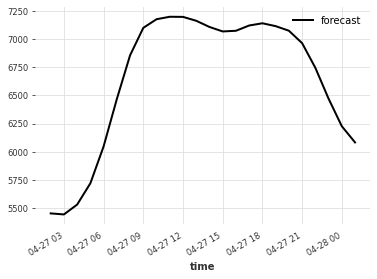

In [ ]:
realpred.plot(label='forecast')
plt.legend()